# Question No 1

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv('delivery_time.csv')
df1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df1.iloc[:, 1]

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: Sorting Time, dtype: int64

In [4]:
df1.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
df1=df1.rename(columns={'Delivery Time': 'dt','Sorting Time': 'st' })
df1.head()

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dt', ylabel='Density'>

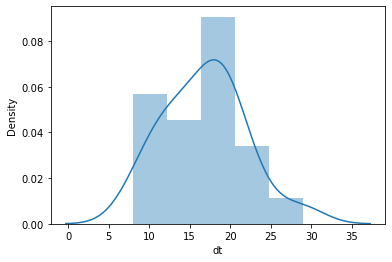

In [7]:
sns.distplot(df1['dt'])

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='st', ylabel='Density'>

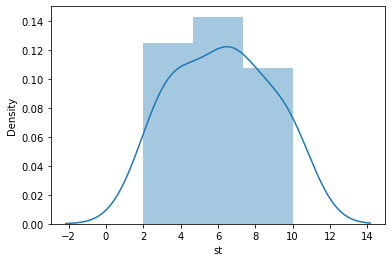

In [8]:
sns.distplot(df1['st'])

Text(0, 0.5, 'Delivery time')

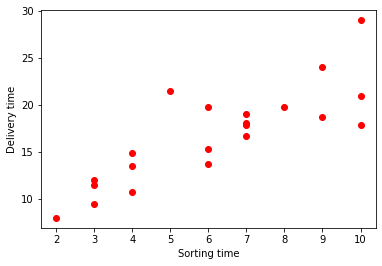

In [9]:
plt.scatter(x='st', y='dt',data=df1, color='red')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

<AxesSubplot:xlabel='st', ylabel='dt'>

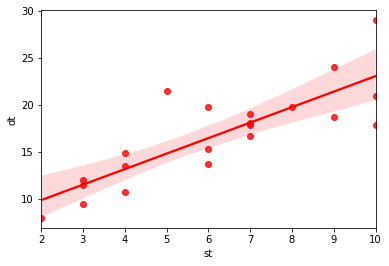

In [10]:
sns.regplot(x="st", y="dt", data=df1,color='red')

{'whiskers': [<matplotlib.lines.Line2D at 0x2093d518eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x2093d5255b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2093d518ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x2093d525ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2093d530040>],
 'means': []}

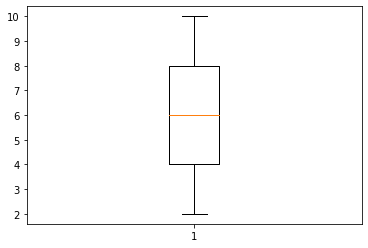

In [11]:
plt.boxplot('st',data=df1)

{'whiskers': [<matplotlib.lines.Line2D at 0x2093d585640>,
 'caps': [<matplotlib.lines.Line2D at 0x2093d585cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2093d5853a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2093d591280>],
 'fliers': [<matplotlib.lines.Line2D at 0x2093d5915e0>],
 'means': []}

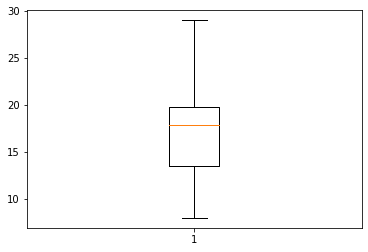

In [12]:
plt.boxplot('dt',data=df1)

In [13]:
df1.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


In [14]:
import statsmodels.formula.api as smf
model1 = smf.ols("dt~st",data = df1).fit()

In [15]:
model1.params

Intercept    6.582734
st           1.649020
dtype: float64

In [16]:
print(model1.tvalues, '\n', model1.pvalues) 

Intercept    3.823349
st           6.387447
dtype: float64 
 Intercept    0.001147
st           0.000004
dtype: float64


In [17]:
(model1.rsquared,model1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [18]:
newdata=pd.Series([10,25])

In [19]:
data_pred=pd.DataFrame(newdata,columns=['st'])

In [20]:
model1.predict(data_pred)

0    23.072933
1    47.808231
dtype: float64